In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
import scoring

# Clustering

## Gene expression

In [3]:
gex = pd.DataFrame.from_csv('Sanger_molecular_data/gex.csv', header=0).transpose()

In [4]:
gex_costs = {}
for i in range(3, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(gex.values)
    gex_costs[i] = (1/i) * kmeans.inertia_
gex_costs

{3: 237066.17848949094,
 4: 171631.8196210211,
 5: 132747.68683503944,
 6: 107461.12594781276,
 7: 89467.50352302687,
 8: 77125.064700917283,
 9: 66313.729377314972,
 10: 58787.855590361534,
 11: 51634.591437537332,
 12: 45936.542704664265,
 13: 41766.549594681113,
 14: 37928.086803291255,
 15: 34779.193580982581,
 16: 32006.38470515516,
 17: 29298.689430022372,
 18: 26619.485180015075,
 19: 24746.592058368235}

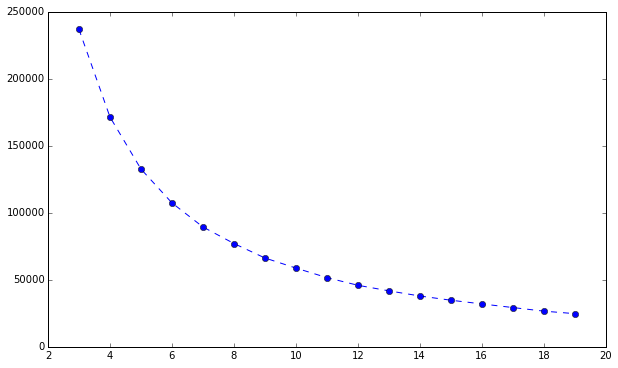

In [5]:
plt.plot([cluster for (cluster, cost) in gex_costs.items()],
         [cost for (cluster, cost) in gex_costs.items()], 'bo--')
plt.show()

In [8]:
gex_kmeans = KMeans(n_clusters = 8, n_init=500)
gex_kmeans.fit(gex.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=500,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [9]:
gex_kmeans.labels_

array([5, 1, 2, 1, 6, 3, 2, 2, 2, 3, 2, 1, 2, 3, 0, 4, 5, 3, 1, 6, 2, 3, 3,
       3, 6, 1, 6, 6, 6, 6, 1, 2, 7, 7, 0, 2, 0, 4, 1, 0, 2, 3, 6, 2, 3, 3,
       2, 3, 6, 3, 2, 2, 4, 2, 2, 7, 1, 2, 2, 1, 2, 1, 1, 4, 4, 7, 2, 0, 2,
       7, 1, 1, 7, 0, 1, 0, 2, 3, 2, 3, 2, 5, 1], dtype=int32)

### Visualize GEX cluster

In [10]:
def plot_cluster(kmeans, reduced_data):
    color_list = ['b', 'r', 'c', 'm', 'y', 'k', '#8400FF', '#00FF15'] 
    labels = kmeans.labels_
    colors = [color_list[i] for i in labels]

    # plot colored points
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, s=50)

    # mark centroids as (X)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:,0],centroids[:,1], marker='x', s = 100, linewidths=2, c='none')

    plt.show();

In [11]:
reduced_data = PCA(n_components=2).fit_transform(gex.values)
kmeans_red = KMeans(n_clusters=8, n_init=50)
kmeans_red.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=50,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

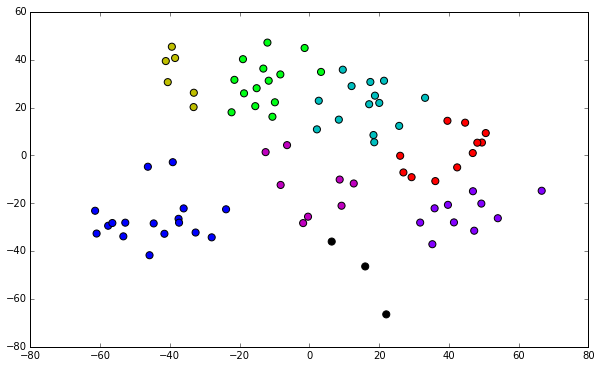

In [12]:
plot_cluster(kmeans_red, reduced_data)

## Cell Info Clustering

In [13]:
cell = pd.DataFrame.from_csv('Sanger_molecular_data/cell_info.csv', header=0)
cell.index.name = None
cell.drop(['CCLE.Name', 'Alternative.Name', 'COSMIC'], axis=1, inplace=True)
cell

,Disease.Area,Tissue..General.
22RV1,Urology,male genital system
647-V,Urology,urinary tract
A549,Lung,lung
BFTC-905,Urology,urinary tract
BT-20,Breast,breast
BT-474,Breast,breast
BT-549,Breast,breast
C32,Niche,soft tissue
CAL-120,Breast,breast
CAL-148,Breast,breast


In [14]:
cell_d = pd.get_dummies(cell)
cell_d.shape

(85, 14)

In [15]:
cell_costs = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cell_d.values)
    cell_costs[i] = (1/i) * kmeans.inertia_
cell_costs

{2: 39.873015873015881,
 3: 16.326530612244895,
 4: 4.5012870012870012,
 5: 2.0395604395604403,
 6: 1.1269841269841265,
 7: 0.47619047619047661,
 8: 2.7755575615628914e-16,
 9: 1.9737298215558337e-16}

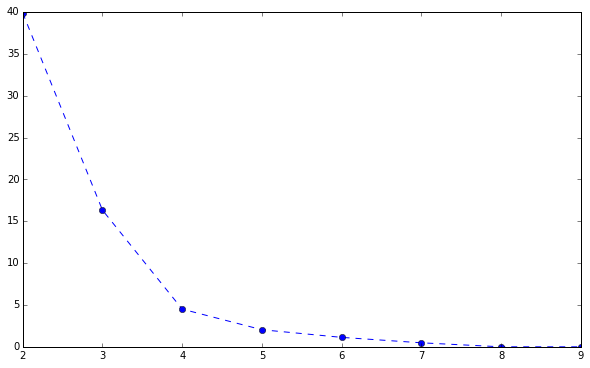

In [16]:
plt.plot([cluster for (cluster, cost) in cell_costs.items()],
         [cost for (cluster, cost) in cell_costs.items()], 'bo--')
plt.show()

In [19]:
cell_kmeans = KMeans(n_clusters = 4, n_init=400)
cell_kmeans.fit(cell_d.values)
cell_kmeans.labels_

array([3, 3, 2, 3, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 3, 0, 3, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 3, 0, 0, 3, 0, 2, 0, 3, 1, 3, 1, 3, 3, 3], dtype=int32)

### Therapy Cluster

In [20]:
orig_data = pd.DataFrame.from_csv('Clean_data/train.csv', header=0)
therapy = orig_data.drop(['SYNERGY_SCORE', 'QA', 'COMBINATION_ID'], axis=1)
therapy = pd.get_dummies(therapy)
therapy.shape

(2145, 110)

In [21]:
therapy_costs = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cell_d.values)
    therapy_costs[i] = (1/i) * kmeans.inertia_
therapy_costs

{2: 39.873015873015881,
 3: 16.326530612244895,
 4: 4.5012870012870012,
 5: 2.0395604395604403,
 6: 1.1269841269841265,
 7: 0.47619047619047661,
 8: 2.7755575615628914e-16,
 9: 1.9737298215558337e-16}

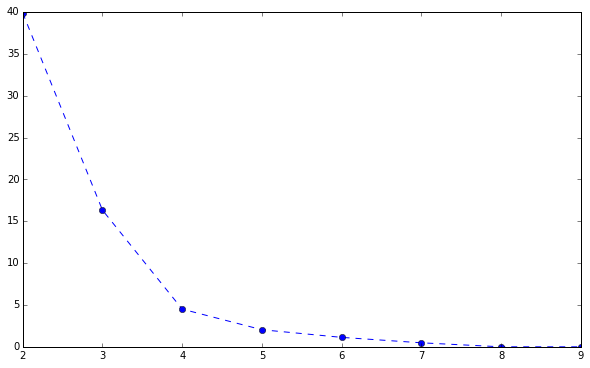

In [22]:
plt.plot([cluster for (cluster, cost) in therapy_costs.items()], 
         [cost for (cluster, cost) in therapy_costs.items()], 'bo--')
plt.show()

In [23]:
therapy_kmeans = KMeans(n_clusters = 4, n_init=400)
therapy_kmeans.fit(therapy.values)
therapy_kmeans.labels_

array([0, 3, 0, ..., 3, 3, 3], dtype=int32)

### Original Data

In [24]:
drug_combined = pd.DataFrame.from_csv('Train_data/drugInfo_combined.csv', index_col=None)

In [25]:
def add_cluster(df, therapy_data = therapy): #, therapy_data = therapy
    rows = df['CELL_LINE'].values
    gex_to_cluster = gex.ix[rows]
    origin_to_cluster = cell_d.ix[rows]
    
    # impute missing values in gene expressions
    imputer = Imputer(missing_values='NaN', strategy="mean", axis=0)
    imputer.fit(gex_to_cluster)
    
    # transform gex, add column w/ prediction
    gex_to_cluster = pd.DataFrame(imputer.transform(gex_to_cluster), columns = gex_to_cluster.columns, index= gex_to_cluster.index)
    
    # cluster therapy data
    therapy_kmeans = KMeans(n_clusters = 4, n_init=400)
    therapy_kmeans.fit(therapy_data.values)
    
    df['GEX_CLUSTER'] = gex_kmeans.predict(gex_to_cluster)
    df['ORIGIN_CLUSTER'] = cell_kmeans.predict(origin_to_cluster)
    df['THERAPY_CLUSTER'] = therapy_kmeans.predict(therapy_data)

In [26]:
add_cluster(drug_combined)

In [27]:
drug_combined

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,A_Lipinski,A_MW,B_HBA,B_cLogP,B_HBD,B_Lipinski,B_MW,GEX_CLUSTER,ORIGIN_CLUSTER,THERAPY_CLUSTER
0,BT-20,ADAM17,AKT,1.00,75.00,1.000000,0.809002,59.122436,9.639714,0.757977,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6,1,0
1,CAL-51,ADAM17,AKT,1.00,75.00,1.000000,0.726984,11.150843,75.000000,0.375043,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,2,1,2
2,HCC1187,ADAM17,AKT,1.00,75.00,0.410029,1.496901,51.921265,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6,1,0
3,HCC1806,ADAM17,AKT,1.00,75.00,0.313992,10.000000,63.399635,75.000000,0.392570,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,1,1,0
4,HCC1937,ADAM17,AKT,1.00,75.00,1.000000,0.771830,41.529554,1.677924,1.119487,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6,1,2
5,HCC70,ADAM17,AKT,1.00,75.00,0.273313,4.442560,17.441897,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6,1,2
6,MDA-MB-231,ADAM17,AKT,1.00,75.00,1.000000,10.000000,67.000017,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,2,1,0
7,MDA-MB-436,ADAM17,AKT,1.00,75.00,0.180147,3.095076,75.768080,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,2,1,0
8,MDA-MB-453,ADAM17,AKT,1.00,75.00,0.282664,2.263455,34.219723,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,3,1,2
9,M14,ADAM17,AKT,1.00,75.00,0.276412,3.749313,36.292590,0.007500,0.100000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,2,0,2


### Expanded Data

In [28]:
full_df = pd.DataFrame.from_csv('Train_data/drug_exp.csv', index_col=None)

In [29]:
add_cluster(full_df)

In [30]:
full_df

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,B_MW,B_ALogP/XLogP,B_PSA,B_#RotBonds,B_Arom Rings,B_Heavy atoms,B_QED,GEX_CLUSTER,ORIGIN_CLUSTER,THERAPY_CLUSTER
0,BT-20,ADAM17,AKT,1.00,75.00,1.000000,0.809002,59.122436,9.639714,0.757977,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,6,1,1
1,CAL-51,ADAM17,AKT,1.00,75.00,1.000000,0.726984,11.150843,75.000000,0.375043,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,2,1,3
2,HCC1187,ADAM17,AKT,1.00,75.00,0.410029,1.496901,51.921265,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,6,1,1
3,HCC1806,ADAM17,AKT,1.00,75.00,0.313992,10.000000,63.399635,75.000000,0.392570,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,1,1,1
4,HCC1937,ADAM17,AKT,1.00,75.00,1.000000,0.771830,41.529554,1.677924,1.119487,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,6,1,3
5,HCC70,ADAM17,AKT,1.00,75.00,0.273313,4.442560,17.441897,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,6,1,3
6,MDA-MB-231,ADAM17,AKT,1.00,75.00,1.000000,10.000000,67.000017,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,2,1,1
7,MDA-MB-436,ADAM17,AKT,1.00,75.00,0.180147,3.095076,75.768080,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,2,1,1
8,MDA-MB-453,ADAM17,AKT,1.00,75.00,0.282664,2.263455,34.219723,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,3,1,3
9,M14,ADAM17,AKT,1.00,75.00,0.276412,3.749313,36.292590,0.007500,0.100000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,2,0,3


In [31]:
full_df.to_csv('Train_data/clustered.csv')

# Algorithm Training

In [32]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC
from sklearn import cross_validation, metrics, preprocessing
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

In [33]:
def print_scores(model):
    print("R^2: " + str(model.score(X_test, y_test)))
    print("RMSE: " + str(scoring.rmse(y_test, model.predict(X_test))) ) # root mean squared error
    print("MAE: " + str(metrics.mean_absolute_error(y_test, model.predict(X_test)))) # mean absolute error
    print("MAPE: " + str(scoring.mape(y_test, model.predict(X_test)))) # mean absolute percent error
    print("Error within 20: " + str(scoring.error_within(0.2, y_test, model.predict(X_test)))) # error within
    print("Pearson: " + str(stats.pearsonr(y_test, model.predict(X_test)))) # pearson correlation

In [34]:
def score(model, X_test, y_test):
    print("R^2: " + str(model.score(X_test, y_test)))
    print("Error within 20: " + str(scoring.error_within(0.2, y_test, model.predict(X_test)))) 
    print("Pearson: " + str(stats.pearsonr(y_test, model.predict(X_test))))

In [297]:
def value_convert(dframe,columns):
    val2num = {}
    count=0
    for col in columns:
        for strval in dframe[col].values:
            if strval in val2num:
                continue
            else:
                val2num[strval] = count
                count+=1
    for col in columns:
        nvals = []
        for strval in dframe[col].values:
            nvals.append(val2num.get(strval))
        dframe[col] = nvals
    return dframe

In [35]:
orig_data = pd.DataFrame.from_csv('Clean_data/train.csv', header=0, index_col=False)
full_df = pd.DataFrame.from_csv('Train_data/clustered.csv', header=0)
# No drug database-queried features:

#drug_combined = drug_combined.iloc[np.random.permutation(len(orig_data))]
#Xpd = pd.get_dummies(drug_combined, columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B']) 
#Ypd = orig_data['SYNERGY_SCORE'].reindex(drug_combined.index)

full_df = full_df.iloc[np.random.permutation(len(orig_data))]
Xpd = pd.get_dummies(full_df, columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B']) 
#Xpd = full_df
#value_convert(Xpd, ['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B'])
Ypd = orig_data['SYNERGY_SCORE'].reindex(full_df.index)

Xvals = Xpd.values
yvals = Ypd.values

In [36]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)

### Random Forest

In [30]:
n_features = n_features = Xvals.shape[1]
rfr = RandomForestRegressor(max_features=.25, max_leaf_nodes=None, 
                            max_depth = None, n_estimators = 1000)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.25, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [31]:
print_scores(rfr)

R^2: 0.264867299086
RMSE: 30.40547342103778
MAE: 20.218928838
MAPE: 5.13249778383
Error within 20: 0.659217877095
Pearson: (0.51882084287396379, 2.457234382617703e-38)


In [34]:
cross_validation.cross_val_score(rfr, Xvals, yvals, cv=5)

array([ 0.327004  ,  0.33465428,  0.29670834,  0.24326384,  0.28963563])

In [158]:
n_features = Xvals.shape[1]
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 0.25]
}
rfr = RandomForestRegressor()

In [159]:
rnd_search_rf = RandomizedSearchCV(rfr, param_grid_rf, n_jobs=2)
for i in range(3):
    print('NEW RANDOM SEARCH...')
    #X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)
    rnd_search_rf.fit(Xvals, yvals)
    print(rnd_search_rf.best_params_)
    print(rnd_search_rf.best_score_)

NEW RANDOM SEARCH...
{'n_estimators': 1000, 'max_features': 0.25}
0.257705019754
NEW RANDOM SEARCH...
{'n_estimators': 1000, 'max_features': 0.25}
0.257731117558
NEW RANDOM SEARCH...
{'n_estimators': 500, 'max_features': 0.25}
0.258430387927


### Gradient Boosting

In [37]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals, random_state=0)

In [38]:
gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=7,
                                max_features='log2', learning_rate=0.03)
# gbr = GradientBoostingRegressor(min_samples_leaf=15, n_estimators=1000, learning_rate=0.01, max_depth=5, 
#                                 max_features='log2')
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.03, loss='ls',
             max_depth=7, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [39]:
print_scores(gbr)

R^2: 0.398550682691
RMSE: 27.61933356739684
MAE: 19.686879305
MAPE: 8.12960697921
Error within 20: 0.487895716946
Pearson: (0.63511689013238204, 5.4194434448488808e-62)


In [208]:
for i in range(10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=7,
                                max_features='log2', learning_rate=0.03)
    gbr.fit(X_train, y_train)
    print_scores(gbr)
    print(" ")

R^2: 0.373281484862
RMSE: 29.271763280813985
MAE: 20.5114419415
MAPE: 9.00999356072
Error within 20: 0.648044692737
Pearson: (0.61347537446101952, 7.8478712990551909e-57)
 
R^2: 0.409707082828
RMSE: 30.237289616370102
MAE: 20.3874936273
MAPE: 10.5150113535
Error within 20: 0.633147113594
Pearson: (0.65045959835403844, 6.5781471162052597e-66)
 
R^2: 0.34960826295
RMSE: 32.29559041959237
MAE: 20.7089487866
MAPE: 3.57668604802
Error within 20: 0.651769087523
Pearson: (0.59641268260905478, 4.8997889183439699e-53)
 
R^2: 0.354771822502
RMSE: 28.761896515197094
MAE: 20.026732701
MAPE: 4.8856558976
Error within 20: 0.638733705773
Pearson: (0.60063240652345218, 5.926034336671623e-54)
 
R^2: 0.322791576466
RMSE: 30.95963212369114
MAE: 20.8249758404
MAPE: 5.92859052578
Error within 20: 0.612662942272
Pearson: (0.57030062126165004, 1.1933235199464217e-47)
 
R^2: 0.348937112117
RMSE: 30.34076523498032
MAE: 20.4423103042
MAPE: 6.78943042468
Error within 20: 0.642458100559
Pearson: (0.59839184482785

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, gbr.predict(X_test))
r_value**2

0.40337346413142849

In [178]:
cross_validation.cross_val_score(gbr, Xvals, yvals, cv=5)

array([ 0.25266754,  0.33715861,  0.34036138,  0.37051874,  0.3941883 ])

In [410]:
param_grid_gb = {
    'learning_rate': [0.01],
    'n_estimators': [1000],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [3, 5],
    'min_samples_leaf': [12, 15]
}
gbr = GradientBoostingRegressor()

In [411]:
grid_search_gb = GridSearchCV(gbr, param_grid_gb, n_jobs=2)
for i in range(3):
    grid_search_gb.fit(Xvals, yvals)
    print(grid_search_gb.best_params_)
    print(grid_search_gb.best_score_)

{'min_samples_leaf': 12, 'n_estimators': 1000, 'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2'}
0.285357695829
{'min_samples_leaf': 15, 'n_estimators': 1000, 'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2'}
0.290567487577
{'min_samples_leaf': 15, 'n_estimators': 1000, 'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt'}
0.285572553141


### Classification

In [44]:
from sklearn.metrics import roc_auc_score

In [49]:
def svm_pred():
    Yclass = Ypd > 0
    Yclass = Yclass.astype(int)
    Yvals = Yclass.values
    
#     m = Ypd.shape[0]
#     Yclass = np.zeros(m)
#     for i in range(m):
#         if Ypd[i] > 5:
#             Yclass[i] = 1
#         elif Ypd[i] < -5:
#             Yclass[i] = -1
#         else:
#             Yclass[i] = 0
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, Yvals)
    
    svm = SVC()
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    print("Classification accuracy: " + str(svm.score(X_test, y_test)))
    print("AUC: " + str(metrics.roc_auc_score(y_test, pred)))

In [50]:
svm_pred()

Classification accuracy: 0.674115456238
AUC: 0.606206204751


## Cumulative Model

In [59]:
def cumulative_model(X_train, X_test, y_train, y_test, numTests=10):
    model = np.zeros((numTests, y_test.shape[0]))
    for i in range(numTests):
        gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=7,
                                    max_features='log2', learning_rate=0.03)
        gbr.fit(X_train, y_train)
        model[i] = gbr.predict(X_test)
    pred = np.mean(model, axis=0)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, pred)
    
    print("R^2: " + str(r_value**2))
    print("RMSE: " + str(scoring.rmse(y_test, pred))) # root mean squared error
    print("MAE: " + str(metrics.mean_absolute_error(y_test, pred))) # mean absolute error
    print("Error within 20: " + str(scoring.error_within(20, y_test, pred))) # error within
    print("Pearson: " + str(stats.pearsonr(y_test, pred))) # pearson correlation
    
    return pred;

In [60]:
pred = cumulative_model(X_train, X_test, y_train, y_test)

R^2: 0.357258747512
RMSE: 28.722132681218355
MAE: 19.9166139375
Error within 20: 0.683426443203
Pearson: (0.59771125764236788, 2.566270746352395e-53)


## Feature testing

In [147]:
def cumulative_test(Xvals, yvals, numTests=5):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals, random_state=0)
    model = np.zeros((numTests, y_test.shape[0]))
    
    for i in range(numTests):
        gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=7,
                                    max_features='log2', learning_rate=0.03)
        gbr.fit(X_train, y_train)
        model[i] = gbr.predict(X_test)
    pred = np.mean(model, axis=0)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, pred)
    
    print("R^2: " + str(r_value**2))
    print("Pearson: " + str(stats.pearsonr(y_test, pred))) # pearson correlation

In [148]:
def score_features():
    features = ['HBA', 'cLogP', 'HBD', 'Lipinski', 'MW', 'ALogP/XLogP', 
            'PSA', '#RotBonds', 'Arom Rings', 'Heavy atoms', 'QED']
    
    print("Full dataframe: ")
    cumulative_test(Xvals, yvals)
    print("\n")
    
    for feat in features:
        Xpd_mod = Xpd.drop(['A_'+feat, 'B_'+feat], axis=1)
        Xvals_mod = Xpd.values
        print("Without " + feat + ": ")
        cumulative_test(Xvals_mod, yvals)
        print("\n")

In [145]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)

In [151]:
score_features()

Full dataframe: 
R^2: 0.335790928419
Pearson: (0.57947470041363147, 1.7357020368500756e-49)


Without HBA: 
R^2: 0.339688775812
Pearson: (0.58282825584519837, 3.5746477870493344e-50)


Without cLogP: 
R^2: 0.344179549501
Pearson: (0.58666817665614357, 5.7228921638065797e-51)


Without HBD: 
R^2: 0.338195645536
Pearson: (0.58154591008470669, 6.5551279098025018e-50)


Without Lipinski: 
R^2: 0.341959185714
Pearson: (0.5847727641689241, 1.4179560587276829e-50)


Without MW: 
R^2: 0.348642374891
Pearson: (0.5904594608365068, 9.1535326040594201e-52)


Without ALogP/XLogP: 
R^2: 0.34139810998
Pearson: (0.58429282896536439, 1.7824953628759106e-50)


Without PSA: 
R^2: 0.34670958314
Pearson: (0.58882050163031308, 2.0276754064099324e-51)


Without #RotBonds: 
R^2: 0.340031470337
Pearson: (0.58312217445121894, 3.1096252051065442e-50)


Without Arom Rings: 
R^2: 0.345043895157
Pearson: (0.58740437107411569, 4.0166430247815893e-51)


Without Heavy atoms: 
R^2: 0.339736256147
Pearson: (0.5828689871

## Visualizations

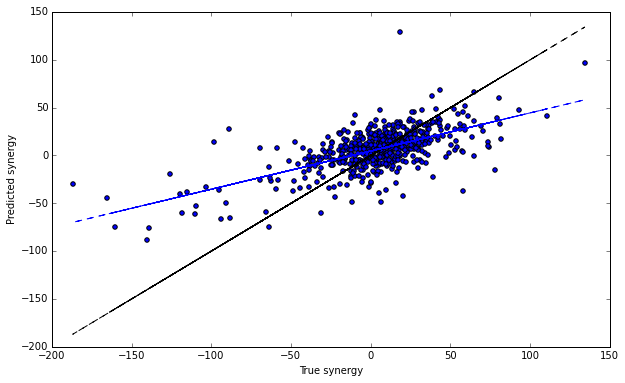

In [51]:
x = y_test
y = gbr.predict(X_test) #pred
plt.scatter(x, y)
plt.plot(x, x, 'k--')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'b--')

plt.axis([-200, 150, -200, 150])
plt.xlabel("True synergy")
plt.ylabel("Predicted synergy")
plt.show()

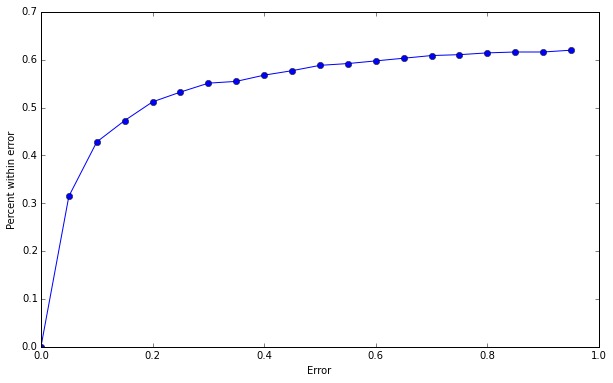

In [37]:
#deviation = np.arange(0, 100, 5)
deviation = np.arange(0, 1, 0.05)
within = np.array([scoring.error_within(x, y_test, gbr.predict(X_test)) for x in deviation])
plt.plot(deviation, within, 'o-')

plt.xlabel("Error")
plt.ylabel("Percent within error")
plt.show()

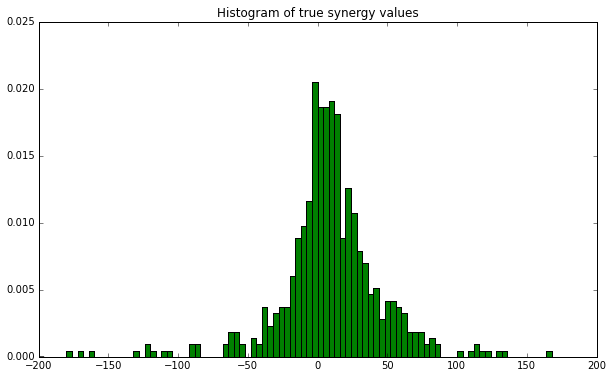

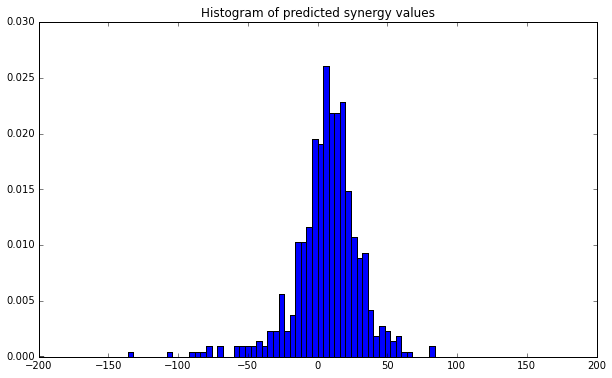

In [239]:
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', range=(-200, 200))
plt.title('Histogram of true synergy values')
plt.figure()
n, bins, patches = plt.hist(y, num_bins, normed=1, facecolor='blue', range=(-200, 200))
plt.title('Histogram of predicted synergy values')
plt.show()

# Leaderboard 1 Submissions

In [240]:
sub_data = pd.DataFrame.from_csv('Drug_synergy_data/ch1_leaderBoard_monoTherapy.csv', index_col=None).dropna(how='all')
base_df = pd.DataFrame.from_csv('Submission/df.csv', index_col=None)
#add_cluster(base_df)

In [241]:
sub_therapy = sub_data.drop(['SYNERGY_SCORE', 'QA', 'COMBINATION_ID'], axis=1)
sub_therapy = pd.get_dummies(sub_therapy)
add_cluster(base_df, therapy_data=sub_therapy)

In [242]:
base_df

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,B_MW,B_ALogP/XLogP,B_PSA,B_#RotBonds,B_Arom Rings,B_Heavy atoms,B_QED,GEX_CLUSTER,ORIGIN_CLUSTER,THERAPY_CLUSTER
0,BT-549,ADAM17,AKT,1.00,75.00,0.184408,1.737511,59.575233,1.000000,0.000000,...,428.90000,1.32000,120.16000,6.000,3.000,30.000,0.57000,1,1,1
1,CAL-148,ADAM17,AKT,1.00,75.00,0.153391,1.754123,1.100779,1.000000,0.000000,...,428.90000,1.32000,120.16000,6.000,3.000,30.000,0.57000,2,1,3
2,HCC38,ADAM17,AKT,1.00,75.00,1.000000,10.000000,64.400080,1.000000,0.000000,...,428.90000,1.32000,120.16000,6.000,3.000,30.000,0.57000,5,1,1
3,BT-20,ADAM17,BCL2_BCL2L1,1.00,75.00,1.000000,1.161732,39.164587,75.000000,0.965792,...,945.50000,5.36446,158.48754,11.564,2.847,60.555,0.19713,7,1,3
4,HCC1143,ADAM17,BCL2_BCL2L1,1.00,75.00,0.115309,10.000000,57.198795,0.007500,0.100000,...,945.50000,5.36446,158.48754,11.564,2.847,60.555,0.19713,0,1,1
5,HCC1937,ADAM17,BCL2_BCL2L1,1.00,75.00,1.000000,0.680025,44.776852,1.460265,0.845486,...,945.50000,5.36446,158.48754,11.564,2.847,60.555,0.19713,7,1,3
6,Hs-578-T,ADAM17,BCL2_BCL2L1,1.00,75.00,0.113821,1.839558,62.844488,1.188576,0.208082,...,945.50000,5.36446,158.48754,11.564,2.847,60.555,0.19713,1,1,1
7,DU-4475,ADAM17,FGFR,1.00,75.00,0.100524,0.748234,82.593193,21.936964,2.163361,...,463.60000,4.20000,91.51000,8.000,4.000,34.000,0.46000,3,1,0
8,HCC1187,ADAM17,FGFR,1.00,75.00,1.000000,0.000000,100.000000,1.000000,0.000000,...,463.60000,4.20000,91.51000,8.000,4.000,34.000,0.46000,7,1,1
9,HCC70,ADAM17,FGFR,1.00,75.00,1.000000,0.000000,100.000000,1.000000,0.000000,...,463.60000,4.20000,91.51000,8.000,4.000,34.000,0.46000,7,1,1


In [434]:
sub_Xpd = base_df #pd.get_dummies(base_df, columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B']) 
value_convert(sub_Xpd, ['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B'])
sub_Xvals = sub_Xpd.values

In [460]:
sub_pred = gbr.predict(sub_Xvals)

In [462]:
pred_cv = pd.DataFrame.from_csv('Submission/prediction.csv', header=0)
pred_cv['PREDICTION'] = sub_pred
pred_cv

,COMBINATION_ID,PREDICTION
CELL_LINE,,
BT-549,ADAM17.AKT,11.672478
CAL-148,ADAM17.AKT,12.458830
HCC38,ADAM17.AKT,6.234641
BT-20,ADAM17.BCL2_BCL2L1,20.383637
HCC1143,ADAM17.BCL2_BCL2L1,10.667504
HCC1937,ADAM17.BCL2_BCL2L1,15.014714
Hs-578-T,ADAM17.BCL2_BCL2L1,16.070129
DU-4475,ADAM17.FGFR,21.157558
HCC1187,ADAM17.FGFR,-9.959805


In [463]:
pred_cv.to_csv('Submission/prediction.csv')

In [336]:
orig_data = pd.DataFrame.from_csv('Clean_data/train.csv', header=0)
combos = pd.DataFrame.from_csv("Submission/combination_priority.csv", header=0)
combos

,CONFIDENCE
COMBINATION_ID,
ADAM17.AKT,0
ADAM17.BCL2_BCL2L1,0
ADAM17.FGFR,0
ADAM17.MAP2K_1,0
ADAM17.MTOR_1,0
ADAM17.PIK3C,0
ADAM17.PIK3CB_PIK3CD,0
AKT.AKT_1,0
AKT.CSNK2A1_2,0


In [351]:
for index, row in combos.iterrows():
    orig_rows = orig_data.loc[orig_data['COMBINATION_ID'] == index]
    syns = orig_rows['SYNERGY_SCORE']
    mean = np.mean(syns)
    if np.isnan(mean):
        mean = 0
    combos.ix[index,'CONFIDENCE']=mean
    #combos.set_value(index, 'CONFIDENCE', mean)

In [357]:
def rescale(values):
    vmin = np.zeros(values.shape[0])
    vmin.fill(np.amin(values))
    vmax = np.zeros(values.shape[0])
    vmax.fill(np.amax(values))
    values = (values - vmin) / (vmax - vmin)
    return values

In [368]:
combos['CONFIDENCE'] = rescale(combos['CONFIDENCE'].values)

In [369]:
combos

,CONFIDENCE
COMBINATION_ID,
ADAM17.AKT,0.429401
ADAM17.BCL2_BCL2L1,0.342756
ADAM17.FGFR,0.303217
ADAM17.MAP2K_1,0.329168
ADAM17.MTOR_1,0.471273
ADAM17.PIK3C,0.502437
ADAM17.PIK3CB_PIK3CD,0.454046
AKT.AKT_1,0.395988
AKT.CSNK2A1_2,0.656817


In [370]:
combos.to_csv('Submission/combination_priority.csv')